<a href="https://colab.research.google.com/github/IlyaPolonik/NN/blob/main/PolonikIlyaNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import imageio

Качаем датасет MNIST и выделяем тренировочные данные и тестовые.


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


60000 для обучения, 10000 для тестирования


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Приводим данные для обучения и тестирования в стандартный вид с уровнем яркости от 0 до 1

In [4]:
x_train = x_train/255
x_test = x_test/255

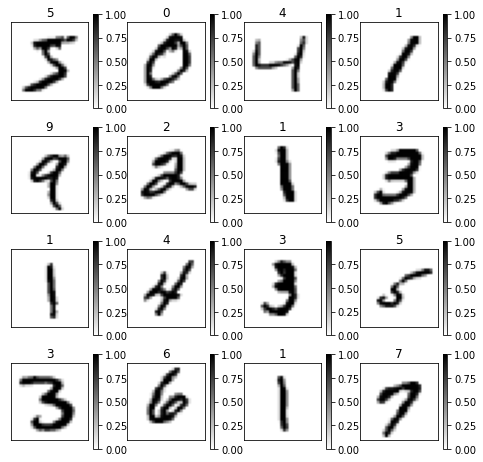

In [10]:

plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap =plt.cm.binary)
  plt.colorbar()
  plt.title(format(y_train[i]))

Первая нейронка на полносвязных сетях

In [55]:
model1 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(64, activation = tf.nn.sigmoid),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [56]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
model1.fit(x_train,y_train,batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7932 - accuracy: 0.8084
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2325 - accuracy: 0.9354
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1722 - accuracy: 0.9515
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1397 - accuracy: 0.9600
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1166 - accuracy: 0.9665


In [58]:
print(model1.evaluate(x_test,y_test))

313/313 [==============================] - 1s 981us/step - loss: 0.1215 - accuracy: 0.9647
[0.12150349467992783, 0.9646999835968018]


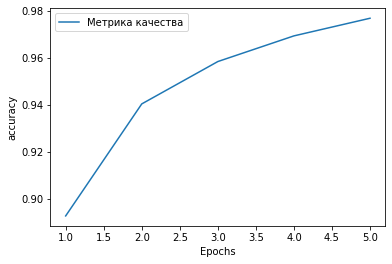

In [59]:

accu_values = Model1.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

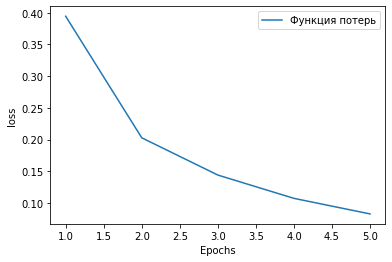

In [60]:
accu_values = Model1.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Вторая нейронка - на свёрточных сетях

In [61]:
model2 =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model2.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [63]:
Model2 = model2.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 47s 50ms/step - loss: 0.4343 - accuracy: 0.8743
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0684 - accuracy: 0.9797
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0401 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0251 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0174 - accuracy: 0.9952


In [64]:
print(model2.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 3s 10ms/step - loss: 0.0416 - accuracy: 0.9866
[0.04162701964378357, 0.9865999817848206]


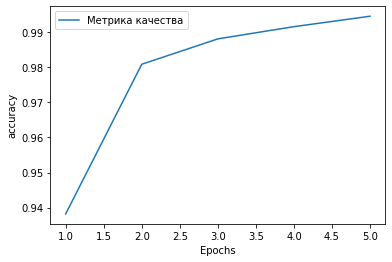

In [65]:
accu_values = Model2.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

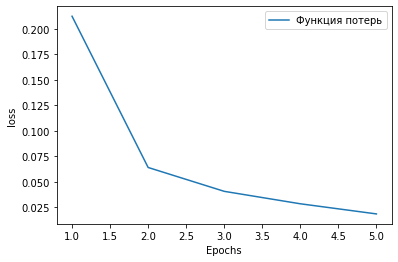

In [66]:

accu_values = Model2.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Третья нейронка - на двойных сверточных сетях

In [67]:

model3 =  tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D( filters=64, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [68]:
model3.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [69]:
Model3 = model3.fit(x_train.reshape(-1, 28, 28, 1),y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2572 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0429 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0172 - accuracy: 0.9947


In [70]:
print(model3.evaluate(x_test.reshape(-1, 28, 28, 1),y_test))

313/313 [==============================] - 4s 12ms/step - loss: 0.0279 - accuracy: 0.9918
[0.027861716225743294, 0.9918000102043152]


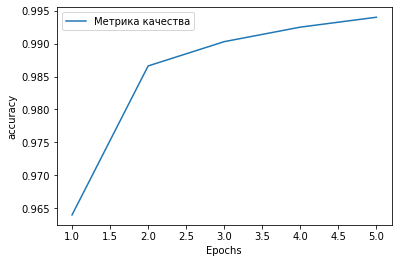

In [71]:
accu_values = Model3.history['accuracy']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Метрика качества')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

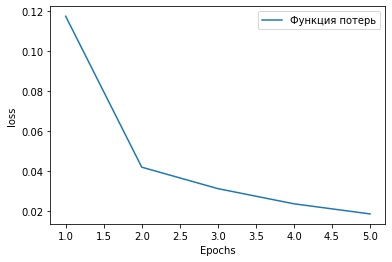

In [72]:
accu_values = Model3.history['loss']
epochs = range(1,len(accu_values) + 1)
plt.plot(epochs,accu_values,label = 'Функция потерь')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()